In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
import bokeh  


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import scipy
import statsmodels.api as sm
import datetime as dt

In [3]:
df = pd.read_csv(r"C:\Users\soora\Downloads\iot_telemetry_data.csv")

In [4]:
df["Time"]=pd.to_datetime(df["ts"])
df["Time"]

0        1970-01-01 00:00:01.594512094
1        1970-01-01 00:00:01.594512094
2        1970-01-01 00:00:01.594512098
3        1970-01-01 00:00:01.594512099
4        1970-01-01 00:00:01.594512101
                      ...             
405179   1970-01-01 00:00:01.595203413
405180   1970-01-01 00:00:01.595203413
405181   1970-01-01 00:00:01.595203416
405182   1970-01-01 00:00:01.595203416
405183   1970-01-01 00:00:01.595203417
Name: Time, Length: 405184, dtype: datetime64[ns]

In [5]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,Time
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,1970-01-01 00:00:01.594512094
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,1970-01-01 00:00:01.594512094
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,1970-01-01 00:00:01.594512098
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,1970-01-01 00:00:01.594512099
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,1970-01-01 00:00:01.594512101


In [6]:
df.tail()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,Time
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001,1970-01-01 00:00:01.595203413
405180,1.595203e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000,1970-01-01 00:00:01.595203413
405181,1.595203e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000,1970-01-01 00:00:01.595203416
405182,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001,1970-01-01 00:00:01.595203416
405183,1.595203e+09,b8:27:eb:bf:9d:51,0.005914,48.400000,False,0.008695,False,0.023400,22.200000,1970-01-01 00:00:01.595203417


In [7]:
df.replace(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'], ['C1','C2','C3'], inplace=True)
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,Time
0,1.594512e+09,C1,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,1970-01-01 00:00:01.594512094
1,1.594512e+09,C2,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,1970-01-01 00:00:01.594512094
2,1.594512e+09,C1,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,1970-01-01 00:00:01.594512098
3,1.594512e+09,C3,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,1970-01-01 00:00:01.594512099
4,1.594512e+09,C1,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,1970-01-01 00:00:01.594512101


In [8]:
df.dropna(inplace=True)

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
Time        0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ts        405184 non-null  float64       
 1   device    405184 non-null  object        
 2   co        405184 non-null  float64       
 3   humidity  405184 non-null  float64       
 4   light     405184 non-null  bool          
 5   lpg       405184 non-null  float64       
 6   motion    405184 non-null  bool          
 7   smoke     405184 non-null  float64       
 8   temp      405184 non-null  float64       
 9   Time      405184 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(6), object(1)
memory usage: 25.5+ MB


In [11]:
df.describe()

,ts,co,humidity,lpg,smoke,temp
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,1.594858e+09,0.004639,60.511694,0.007237,0.019264,22.453987
std,1.994984e+05,0.001250,11.366489,0.001444,0.004086,2.698347
min,1.594512e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.594686e+09,0.003919,51.000000,0.006456,0.017024,19.900000
50%,1.594858e+09,0.004812,54.900000,0.007489,0.019950,22.200000
75%,1.595031e+09,0.005409,74.300003,0.008150,0.021838,23.600000
max,1.595203e+09,0.014420,99.900002,0.016567,0.046590,30.600000


In [12]:
# Convert boolean columns to numeric (0 and 1)
boolean_columns = ['light', 'motion', 'smoke']  
df[boolean_columns] = df[boolean_columns].astype(int)

In [13]:
encoded_df = pd.get_dummies(df, columns=['device'], drop_first=True)


In [14]:
print(df.dtypes)

ts                 float64
device              object
co                 float64
humidity           float64
light                int32
lpg                float64
motion               int32
smoke                int32
temp               float64
Time        datetime64[ns]
dtype: object


In [15]:
d1=df[df['device']=='C1']
d2=df[df['device']=='C2']
d3=df[df['device']=='C3']

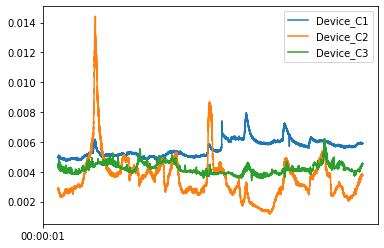

In [16]:
plt.plot(d1['Time'],d1['co'],label="Device_C1")
plt.plot(d2['Time'],d2["co"],label="Device_C2")
plt.plot(d3["Time"],d3["co"],label="Device_C3")

plt.legend()
plt.show()

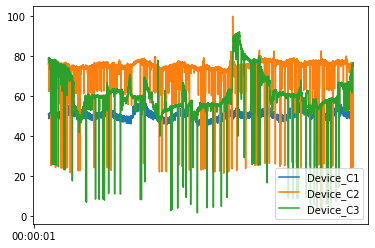

In [17]:
plt.plot(d1['Time'],d1['humidity'],label="Device_C1")
plt.plot(d2['Time'],d2["humidity"],label="Device_C2")
plt.plot(d3["Time"],d3["humidity"],label="Device_C3")

plt.legend()
plt.show()

In [18]:
numerical_columns = ['ts', 'co', 'humidity', 'lpg', 'temp']

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(outliers)
    df[~((df[column] < lower_bound) | (df[column] > upper_bound))]


Empty DataFrame
Columns: [ts, device, co, humidity, light, lpg, motion, smoke, temp, Time]
Index: []
                  ts device        co   humidity  light       lpg  motion  \
47089   1.594593e+09     C2  0.007848  73.500000      0  0.010669       0   
47107   1.594593e+09     C2  0.007848  73.500000      0  0.010669       0   
47112   1.594593e+09     C2  0.007681  73.599998      0  0.010504       0   
47118   1.594593e+09     C2  0.007848  73.400002      0  0.010669       0   
47121   1.594593e+09     C2  0.007848  73.300003      0  0.010669       0   
...              ...    ...       ...        ...    ...       ...     ...   
286798  1.595001e+09     C2  0.001671  78.400002      0  0.003484       0   
286803  1.595001e+09     C2  0.001654  78.400002      0  0.003459       0   
286806  1.595001e+09     C2  0.001638  78.400002      0  0.003435       0   
286838  1.595001e+09     C2  0.001654  78.300003      0  0.003459       0   
286849  1.595002e+09     C2  0.001671  78.199997    

In [19]:
scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [20]:
correlation_matrix = df[['co', 'temp', 'humidity']].corr()
print(correlation_matrix)

                co      temp  humidity
co        1.000000  0.110905 -0.656750
temp      0.110905  1.000000 -0.410427
humidity -0.656750 -0.410427  1.000000


There seems to be a weak positive correlation between CO levels and temperature, indicating a limited influence of temperature on CO readings in this dataset.
However, there's a moderately strong negative correlation between CO levels and humidity, suggesting a more significant impact of humidity on CO readings—higher humidity associated with lower CO levels.
Additionally, there's a moderate negative correlation between temperature and humidity, indicating a relationship between these environmental factors.

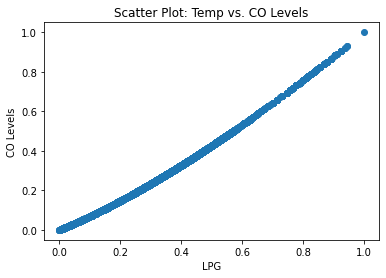

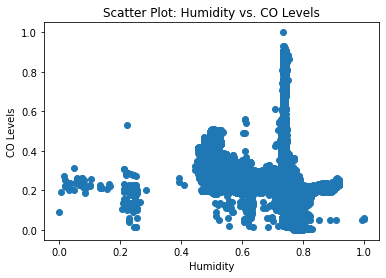

In [21]:
plt.scatter(df['lpg'], df['co']) 
plt.xlabel('LPG')  
plt.ylabel('CO Levels')
plt.title('Scatter Plot: Temp vs. CO Levels')
plt.show()

plt.scatter(df['humidity'], df['co'])
plt.xlabel('Humidity')
plt.ylabel('CO Levels')
plt.title('Scatter Plot: Humidity vs. CO Levels')
plt.show()


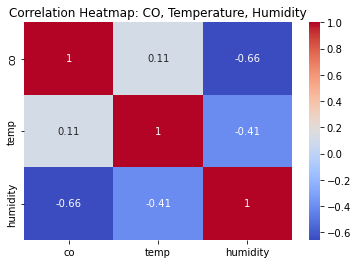

In [22]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: CO, Temperature, Humidity')
plt.show()


In [23]:
from sklearn.ensemble import RandomForestRegressor
X = df[['temp', 'humidity','smoke','lpg']] 
y = df['co']

model = RandomForestRegressor()  
model.fit(X, y)  

RandomForestRegressor()

In [24]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

    Feature    Importance
3       lpg  9.999999e-01
1  humidity  3.377695e-08
0      temp  1.885515e-08
2     smoke  0.000000e+00


In [25]:
from sklearn.feature_selection import SelectKBest, f_regression
X = df[['temp', 'humidity','smoke','lpg']] 
y = df['co']

k_best = SelectKBest(score_func=f_regression, k=2)  
X_best = k_best.fit_transform(X, y)

selected_feature_indices = k_best.get_support(indices=True)

selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['humidity', 'lpg'], dtype='object')


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X = df[['temp', 'humidity','lpg','smoke']]
y = df['co']

model = RandomForestRegressor()


rfe = RFE(estimator=model, n_features_to_select=2)  
X_rfe = rfe.fit_transform(X, y)

selected_feature_indices = rfe.get_support(indices=True)

selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)


Selected Features: Index(['temp', 'lpg'], dtype='object')


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 4.125616007123688e-05
R-squared: 0.9953625755909576


In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 6.263700072472611e-08
R-squared: 0.9999929592488596


In [29]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 7.341946818818099e-07
R-squared: 0.999917472388781


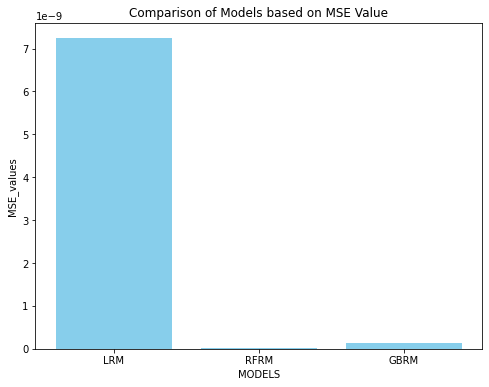

In [30]:
Models=['LRM','RFRM','GBRM']
MSE_Values=[7.242593747366633e-09,1.0894217864677056e-11,1.3016670689045928e-10]
R_squared_Values=[0.9953625755909576,0.9999930244448874,0.9999166544079602]

plt.figure(figsize=(8,6))
plt.bar(Models,MSE_Values,color='skyblue')
plt.xlabel("MODELS")
plt.ylabel("MSE_values")
plt.title("Comparison of Models based on MSE Value")
plt.show()


In [31]:
from sklearn.svm import SVR

# Define the SVR model with desired hyperparameters
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 0.000665705868037544
R-squared: 0.9251709166255557


In [32]:
from xgboost import XGBRegressor

# Define the XGBoost model with desired hyperparameters
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 1.0268270946218976e-07
R-squared: 0.9999884578859878


In [35]:
from sklearn.neighbors import KNeighborsRegressor

# Define the KNN model with desired hyperparameters
model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 1.1748118299851262e-06
R-squared: 0.9998679445433846


In [37]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    "KNN": KNeighborsRegressor(n_neighbors=5)
    }

In [38]:
# Dictionary to store results
results = {"Algorithm": [], "MSE": [], "R-squared": []}

# Model fitting and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    results["Algorithm"].append(name)
    results["MSE"].append(mse)
    results["R-squared"].append(r_squared)

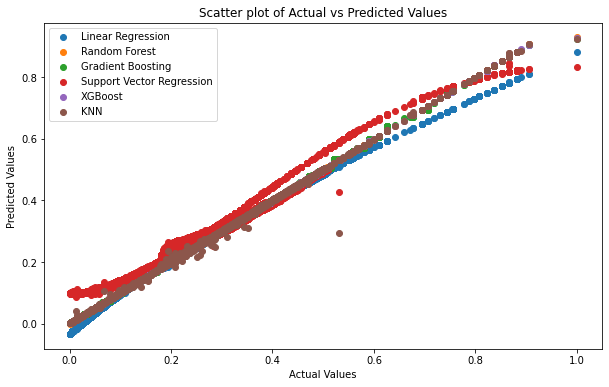

In [39]:
# 1. Performance Comparison
# Scatter plot
plt.figure(figsize=(10, 6))
for name, model in models.items():
    predictions = model.predict(X_test)
    plt.scatter(y_test, predictions, label=name)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter plot of Actual vs Predicted Values")
plt.legend()
plt.show()

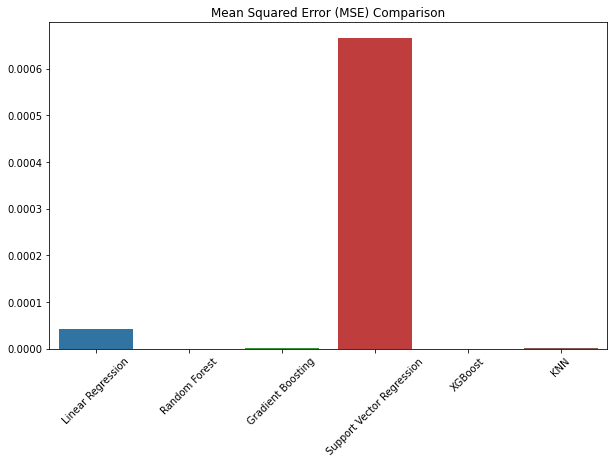

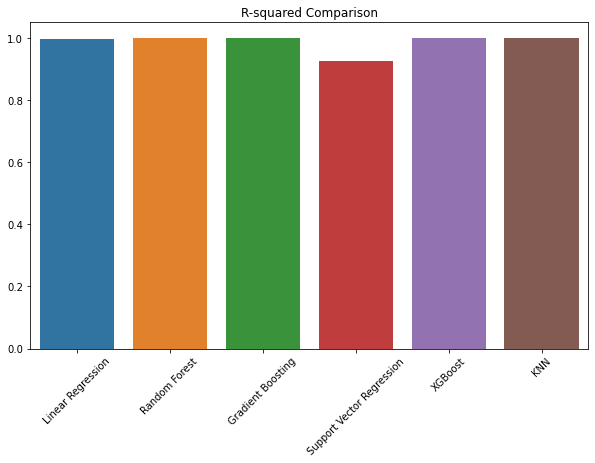

In [40]:
# Bar chart for MSE and R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x="Algorithm", y="MSE", data=results)
plt.title("Mean Squared Error (MSE) Comparison")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Algorithm", y="R-squared", data=results)
plt.title("R-squared Comparison")
plt.xticks(rotation=45)
plt.show()

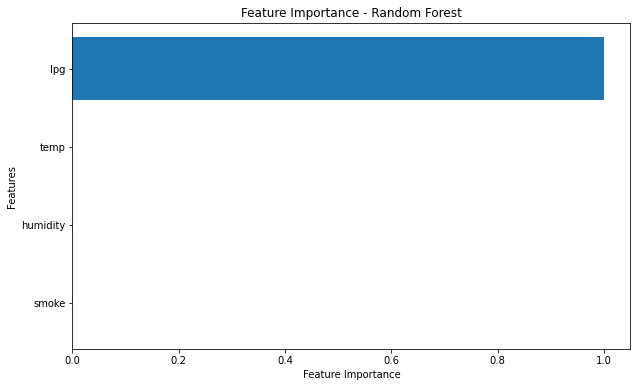

In [41]:
# 2. Feature Importance (for Random Forest and Gradient Boosting)
rf_model = models["Random Forest"]
if hasattr(rf_model, 'feature_importances_'):
    feature_importance = rf_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    features = X.columns
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance - Random Forest')
    plt.show()

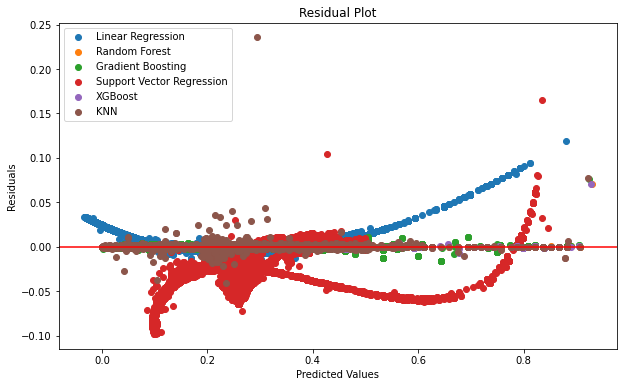

In [42]:
# 3. Error Analysis
# Residual plot
plt.figure(figsize=(10, 6))
for name, model in models.items():
    predictions = model.predict(X_test)
    residuals = y_test - predictions
    plt.scatter(predictions, residuals, label=name)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.legend()
plt.show()

In [43]:
from sklearn.decomposition import PCA

# Assuming you have your data stored in a NumPy array named 'X'
# Standardize the data (optional but recommended)
X_std = StandardScaler().fit_transform(X)

# Define the number of principal components to retain (e.g., 90% of variance)
pca = PCA(n_components=0.9)

# Fit the PCA model to the standardized data
pca.fit(X_std)

# Transform the data using the fitted PCA model
X_pca = pca.transform(X_std)

# X_pca will now contain the data projected onto the principal components

# Access the explained variance ratio per component (optional)
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio for the first few components
print("Explained variance ratio:")
print(explained_variance[:10])  # Print the first 10 components


Explained variance ratio:
[0.61755608 0.29315204]


In [45]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your training and testing data split (X_train, X_test, y_train, y_test)

# Standardize the data (optional but recommended)
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

# Define the number of principal components to retain (e.g., 90% of variance)
pca = PCA(n_components=0.9)

# Fit the PCA model to the standardized training data
pca.fit(X_train_std)

# Transform the training and testing data using the fitted PCA model
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Define the KNN model with desired hyperparameters
model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the PCA-transformed training data and target variable
model.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed testing data
predictions = model.predict(X_test_pca)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 5.0772060884720125e-05
R-squared: 0.9942929348238511
